<a href="https://colab.research.google.com/github/pikey-msc/Python/blob/main/M3/C5_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montecarlo

La clave de este método está en entender el término ‘simulación’. Realizar una simulación consiste en repetir, o duplicar, las características y comportamientos de un sistema real. Así pues, el objetivo principal de la simulación de Montecarlo es intentar imitar el comportamiento de variables reales para, en la medida de lo posible, analizar o predecir cómo van a evolucionar.

Lo importante es saber para qué se utiliza este método. Es decir, casos concretos para entender la importancia del método. En economía, la simulación de Montecarlo se utiliza tanto en empresas como en inversión. Siendo en el mundo de la inversión donde más se utiliza.

Algunos ejemplos de simulación de Montecarlo en inversión son los siguientes:

* Crear, valorar y analizar carteras de inversión
* Valorar productos financieros complejos como las opciones financieras
* Creación de modelos de gestión de riesgo

Dado que la rentabilidad de una inversión es impredecible, se utiliza este tipo de método para evaluar distintos tipos de escenarios.

## Área del circulo

Calcularemos un circulo con radio igual a 1, es lo mismo a decir que aproximemos el valor de π.

Esto significa muestrear aleatoriamente un universo de resultados posibles y tomar la fracción de muestras aleatorias que caen en un conjunto dado como una estimación del volumen del conjunto. La **ley de grandes números** asegura que esta estimación converja al valor correcto a medida que aumenta el número de muestras. El **teorema del límite central** proporciona información sobre la magnitud del probable error en la estimación después de un número finito de muestras.



In [ ]:
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats

%matplotlib inline

In [ ]:
np.random.seed(5) # para poder replicar el random

Para facilicartnos el procedimiento, generaremos una función.

In [ ]:
def mc_pi_aprox(N):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

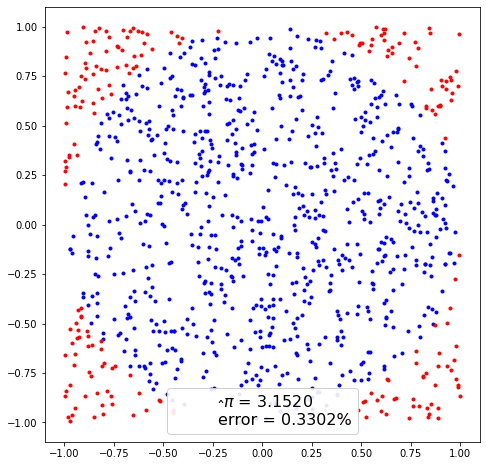

In [ ]:
mc_pi_aprox(1000)

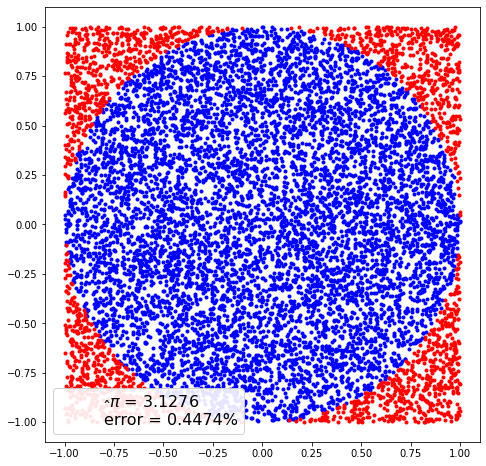

In [ ]:
mc_pi_aprox(10000)

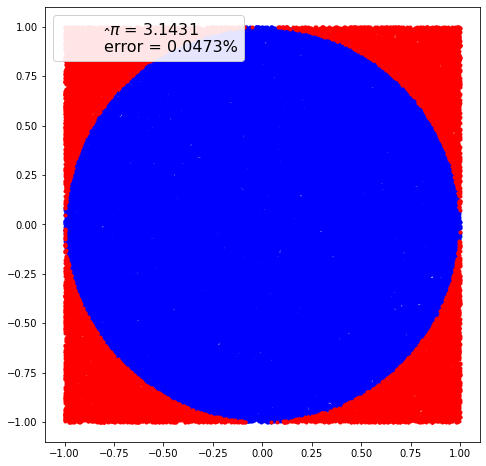

In [ ]:
mc_pi_aprox(100000)

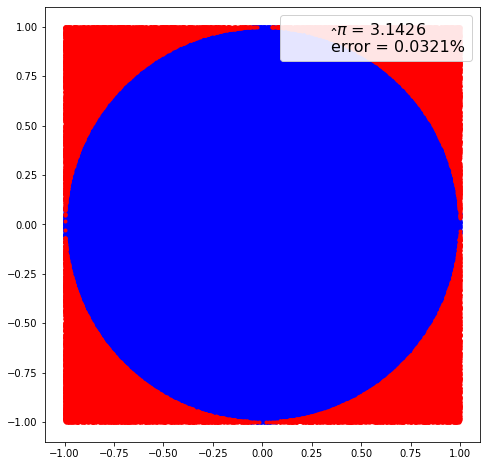

In [ ]:
mc_pi_aprox(500000)

Como vemos en este ejemplo, para calcular el área del círculo realizamos un gran número de experimentos aleatorios, en el primer ejemplo utilizamos 10,000 experimentos; y luego calculamos el área obteniendo una media aritmética de los valores que caen dentro de la superficie del círculo. Debemos hacer notar que incluso utilizando un gran número de experimentos aún así en el primer ejemplo no logramos obtener los primeros dos decimales correctos; recién en el segundo ejemplo, cuando utilizamos 100,000 experimentos logramos obtener los primeros dos dígitos correctos; esto demuestra que el Método de Monte-Carlo en su versión más cruda tarda bastante en converger al valor aproximado.

# CAPM

**Capital Asset Pricing Model**

Es un modelo de valoración de activos financieros desarrollado por William Sharpe que permite estimar su rentabilidad esperada en función del riesgo sistemático.

## ¿Cuál es la ecuación de CAPM?
$$r_i(t)=\beta_ir_m(t)+\alpha_i(t)$$
donde $i$ es una acción individual

$r_i(t)$: retorno de la acción $i$ al tiempo $t$ \\
$\beta_i$: beta de acción $i$ \\
$r_m(t)$: retorno del mercado $m$ al tiempo $t$ \\
$\alpha_i(t)$: $\alpha$ de acción $i$ al tiempo $t$ \\

$\beta$ de la acción $i$ se asocia con el riesgo que la aación añadirá al portafolio en comparación con el mercado. \\
$\beta=1$ significa que la acción está en línea con el mercado. \\
De acuerdo con el CAPM, el valor de $\alpha$ se espera que sea cero y que es aleatorio y no puede ser predecido. \\
Dicha ecuación puede verse de la forma $y=mx+b$ y puede tratarse como una regresión lineal.




In [ ]:
!pip install -U yfinance
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from scipy import stats

In [ ]:

start = datetime.datetime(2020,3,8)
end = datetime.datetime(2022,3,8)

tickers_list = ['SPY','FB']

In [ ]:
df = yf.download(tickers_list, '2020-01-01', '2020-12-31')
df.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High                     Low                    Open                Volume          
                    FB         SPY          FB         SPY          FB         SPY          FB         SPY          FB         SPY        FB       SPY
Date                                                                                                                                                  
2020-01-02  209.779999  314.719147  209.779999  324.869995  209.789993  324.890015  206.270004  322.529999  206.750000  323.540009  12077100  59151200
2020-01-03  208.669998  312.336090  208.669998  322.410004  210.399994  323.640015  206.949997  321.100006  207.210007  321.160004  11188400  77709700
2020-01-06  212.600006  313.527649  212.600006  323.640015  212.779999  323.730011  206.520004  320.359985  206.699997  320.489990  17058900  55653900
2020-01-07  213.059998  312.646088  213.059998  322.730011  214.580002  323.540009  211.750000  322.239990  212.820007  323.019989  14912400  40496400
2020-01-08  215.220001  314.312347  215.220001  324.450012  216.240005  325.779999  212.610001  322.670013  213.000000  322.940002  13475000  68296000

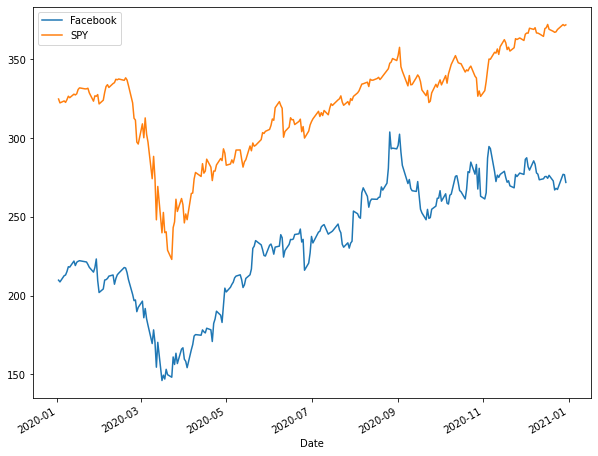

In [ ]:
df.Close["FB"].plot(label='Facebook', figsize=(10,8))
df.Close["SPY"].plot(label="SPY")
plt.legend()

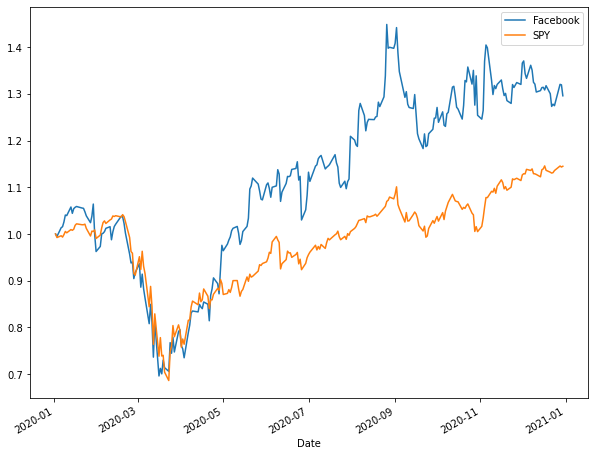

In [ ]:
df['Cumu_FB'] = df.Close['FB']/df.Close['FB'].iloc[0]
df['Cumu_SP'] = df.Close['SPY']/df.Close['SPY'].iloc[0]

df['Cumu_FB'].plot(label = 'Facebook', figsize=(10,8))
df['Cumu_SP'].plot(label = 'SPY')
plt.legend()

Se determinan retornos diarios

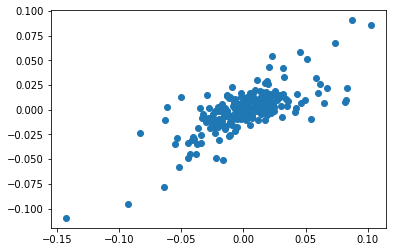

In [ ]:
df['daily_ret_FB'] = df.Close['FB'].pct_change(1)
df['daily_ret_SP'] = df.Close['SPY'].pct_change(1)

plt.scatter(df['daily_ret_FB'],df['daily_ret_SP'])

## Encontrar los valores $\alpha$ y $\beta$ \\
Se encontrarán usando la paquetería de scipy a través de una regresión lineal, también se puede utilizar la multiplicación de matrices $\hat{\beta}=(X^T\cdot Y)(X^T\cdot X)^{-1}$

In [ ]:
LR=stats.linregress(df['daily_ret_FB'].iloc[1:],df['daily_ret_SP'].iloc[1:])
LR

LinregressResult(slope=0.54107877077218, intercept=-2.135701255990012e-05, rvalue=0.7405720324484146, pvalue=6.977000352998105e-45, stderr=0.031113431444842313)

In [ ]:
beta,alpha,r_val,p_val,std_err = LR
print(beta)
print(alpha)
print(p_val)
print(std_err)

0.54107877077218
-2.135701255990012e-05
6.977000352998105e-45
0.031113431444842313


Instalamos las librerias

In [ ]:
!pip install -U yfinance
import matplotlib.pyplot as plt
import yfinance as yf

     |████████████████████████████████| 6.4 MB 18.9 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#Configuración de pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', False)

In [ ]:
tickers_list = ['AAPL','MSFT','SQ','AMZN']

In [ ]:
data = yf.download(tickers_list, '2020-01-01', '2020-12-31')
data

[*********************100%***********************]  5 of 5 completed


Adj Close                                                          Close                                                     ...        Open                                                          Volume                                                
                  AAPL         AMZN       BTC-USD        MSFT          SQ        AAPL         AMZN       BTC-USD        MSFT          SQ  ...        AAPL         AMZN       BTC-USD        MSFT          SQ         AAPL       AMZN      BTC-USD        MSFT          SQ
Date                                                                                                                                      ...                                                                                                                            
2020-01-01         NaN          NaN   7200.174316         NaN         NaN         NaN          NaN   7200.174316         NaN         NaN  ...         NaN          NaN   7194.892090         NaN         NaN          NaN        NaN  18565664997         NaN         NaN
2020-01-02   73.894333  1898.010010   6985.470215  157.289886   63.830002   75.087502  1898.010010   6985.470215  160.619995   63.830002  ...   74.059998  1875.000000   7202.551270  158.779999   62.990002  135480400.0  4029000.0  20802083465  22622100.0   5264700.0
2020-01-03   73.175919  1874.969971   7344.884277  155.331329   63.000000   74.357498  1874.969971   7344.884277  158.619995   63.000000  ...   74.287498  1864.500000   6984.428711  158.320007   62.590000  146322800.0  3764400.0  28111481032  21116200.0   5087100.0
2020-01-04         NaN          NaN   7410.656738         NaN         NaN         NaN          NaN   7410.656738         NaN         NaN  ...         NaN          NaN   7345.375488         NaN         NaN          NaN        NaN  18444271275         NaN         NaN
2020-01-05         NaN          NaN   7411.317383         NaN         NaN         NaN          NaN   7411.317383         NaN         NaN  ...         NaN          NaN   7410.451660         NaN         NaN          NaN        NaN  19725074095         NaN         NaN
...                ...          ...           ...         ...         ...         ...          ...           ...         ...         ...  ...         ...          ...           ...         ...         ...          ...        ...          ...         ...         ...
2020-12-27         NaN          NaN  26272.294922         NaN         NaN         NaN          NaN  26272.294922         NaN         NaN  ...         NaN          NaN  26439.373047         NaN         NaN          NaN        NaN  66479895605         NaN         NaN
2020-12-28  135.679642  3283.959961  27084.808594  222.629669  223.339996  136.690002  3283.959961  27084.808594  224.960007  223.339996  ...  133.990005  3194.000000  26280.822266  224.449997  232.380005  124486200.0  5686800.0  49056742893  17933500.0  11640000.0
2020-12-29  133.873093  3322.000000  27362.437500  221.828033  214.000000  134.869995  3322.000000  27362.437500  224.149994  214.000000  ...  138.050003  3309.939941  27081.810547  226.309998  223.880005  121047300.0  4872900.0  45265946774  17403200.0  15453100.0
2020-12-30  132.731598  3285.850098  28840.953125  219.383621  221.039993  133.720001  3285.850098  28840.953125  221.679993  221.039993  ...  135.580002  3341.000000  27360.089844  225.229996  215.940002   96452100.0  3209300.0  51287442704  20272300.0   9837000.0
2020-12-31         NaN          NaN  29001.720703         NaN         NaN         NaN          NaN  29001.720703         NaN         NaN  ...         NaN          NaN  28841.574219         NaN         NaN          NaN        NaN  46754964848         NaN         NaN

[366 rows x 30 columns]

In [ ]:
data.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'MSFT'),
            ('Adj Close',   'SQ'),
            (    'Close', 'AAPL'),
            (    'Close', 'AMZN'),
            (    'Close', 'MSFT'),
            (    'Close',   'SQ'),
            (     'High', 'AAPL'),
            (     'High', 'AMZN'),
            (     'High', 'MSFT'),
            (     'High',   'SQ'),
            (      'Low', 'AAPL'),
            (      'Low', 'AMZN'),
            (      'Low', 'MSFT'),
            (      'Low',   'SQ'),
            (     'Open', 'AAPL'),
            (     'Open', 'AMZN'),
            (     'Open', 'MSFT'),
            (     'Open',   'SQ'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'AMZN'),
            (   'Volume', 'MSFT'),
            (   'Volume',   'SQ')],
           )

In [ ]:
df_precios = data[['Close']]
df_precios.head()

Close                                    
                 AAPL         AMZN        MSFT         SQ
Date                                                     
2020-01-02  75.087502  1898.010010  160.619995  63.830002
2020-01-03  74.357498  1874.969971  158.619995  63.000000
2020-01-06  74.949997  1902.880005  159.029999  62.570000
2020-01-07  74.597504  1906.859985  157.580002  64.589996
2020-01-08  75.797501  1891.969971  160.089996  67.599998

In [ ]:
df_precios.isnull().sum()

Close  AAPL    0
       AMZN    0
       MSFT    0
       SQ      0
dtype: int64

In [ ]:
df_precios.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-02 to 2020-12-30
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AAPL)  252 non-null    float64
 1   (Close, AMZN)  252 non-null    float64
 2   (Close, MSFT)  252 non-null    float64
 3   (Close, SQ)    252 non-null    float64
dtypes: float64(4)
memory usage: 9.8 KB


Rp = Retorno de portafolio 

Rf = Tasa libre de riesgo

sr = Desviación estándar excedente de retorno del portafolio

sr = $(Rp - Rf)/sr$

Rp = $w1*r1 + w2*r2 +...+ wk*rk$,   donde $ri$= retorno del instrumento i, y wi es la proporción que tenemos del intrumento i.

In [ ]:
retornos = df_precios.pct_change().dropna()

In [ ]:
retornos

Close                              
                AAPL      AMZN      MSFT        SQ
Date                                              
2020-01-03 -0.009722 -0.012139 -0.012452 -0.013003
2020-01-06  0.007968  0.014886  0.002585 -0.006825
2020-01-07 -0.004703  0.002092 -0.009118  0.032284
2020-01-08  0.016086 -0.007809  0.015928  0.046602
2020-01-09  0.021241  0.004799  0.012493  0.004882
...              ...       ...       ...       ...
2020-12-23 -0.006976 -0.006627 -0.013039 -0.045120
2020-12-24  0.007712 -0.003949  0.007827 -0.010404
2020-12-28  0.035766  0.035071  0.009921 -0.021640
2020-12-29 -0.013315  0.011584 -0.003601 -0.041820
2020-12-30 -0.008527 -0.010882 -0.011019  0.032897

[251 rows x 4 columns]

In [ ]:
retornos.sum()

Close  AAPL    0.686458
       AMZN    0.623004
       MSFT    0.418861
       SQ      1.518400
dtype: float64

In [ ]:
retornos.mean()*252

Close  AAPL    0.689193
       AMZN    0.625486
       MSFT    0.420530
       SQ      1.524449
dtype: float64

** Pasos a seguir **

* 1. Vamos a generar muchas posibles combinaciones de los pesos wi
* 2. Calcular el Sharpe Ratio (sr).
* 3. Ver para que valores de wi se maximiza.
* 4. Ver para qué valores de wi se minimiza sr

Suponer: tengo un vector aleatorio
$X = (x1, x2,...xn)$
$w = (w1, w2, ..., wn)$ no aleatoria.

$E[w'X] = w'E[X]$: LINEALIDAD DE LA ESPERANZA
$Var(w'X)= w'Cov(X)w$  (es un escalar)

Generamos los pesos de forma aleatoria, los cuales serán fijos y de suma igual a 1

In [ ]:
random_weights = np.array(np.random.random(len(tickers_list)))
norm_weights = random_weights/np.sum(random_weights)

In [ ]:
norm_weights

array([0.2165048 , 0.30482558, 0.14734947, 0.33132015])

Calculamos el valor esperado del retorno anualizado

In [ ]:

exp_ret = np.sum(retornos.mean()*norm_weights)*252
exp_ret

0.9069234508726185

$Var(w'X) = w'Var(X)w$

In [ ]:
vol = np.sqrt( np.dot(norm_weights.T, np.dot(retornos.cov()*252,norm_weights)))
vol

0.4514892500869758

Para el riskpremium calculamos la fórmula: $Rf-Rm$ anualizando la media de los retornos del SP500 menos el riskfree.

Generamos la variable de la fórmula del CAPM, stock_capm_return, y otra para el ratio Sharpe, que mide el grado de rentabilidad ajustado por el riesgo, cuanto mayor sea éste mejor.

$Sharpe$ = $\frac{\bar{r_{i}}-r_{f}}{\sigma_i}$

Suponemos que $R_f$ = 0

In [ ]:
sharpe_ratio = exp_ret/vol

In [ ]:
sharpe_ratio

2.008737640371076

# Frontera eficiente (con simulación)

Generamos el número de portafolios a simular

In [ ]:
num_of_portfolios = 100000 
numero_de_acciones = len(tickers_list)

Generamos los arreglos para llenar información

In [ ]:
m_weights = np.zeros((num_of_portfolios, numero_de_acciones))
ret_arr = np.zeros(num_of_portfolios) #guardar los retornos (returns)
vol_arr = np.zeros(num_of_portfolios) #guardar las volatilidades
sharpe_arr = np.zeros(num_of_portfolios) # guardar los diferentes valores del Sharpe Ratio

Calculamos la matriz de Cov y promedio de retornos

In [ ]:
# matriz de Covarianza de retornos
cov_returns = retornos.cov()
# promedio de retornos
mean_returns = retornos.mean()

In [ ]:
for i in range(num_of_portfolios):
    #calcular los pesos:
    weights = np.array(np.random.random(numero_de_acciones)) #equivale a tomar una muestra de U(0,1)
    weights = weights / np.sum(weights) #normalizando los pesos para que sumen 1
    
    #llenar la matriz con los pesos:
    m_weights[i,:]= weights
    
    #calcularar el retorno
    ret_arr[i] = np.sum(mean_returns*weights)*252
    
    #calcular volatilidad
    vol_arr[i] = np.sqrt( np.dot(weights.T, np.dot(cov_returns*252,weights)))
    
    #calcular Sharpe ratio:
    sharpe_arr[i]= (ret_arr[i] -0)/vol_arr[i]   

Imprimimos resultados

In [ ]:
#Combinar los cálculos anteriores
datos_simulacion = [ret_arr, vol_arr, sharpe_arr, m_weights]

df_simulacion = pd.DataFrame(data=datos_simulacion).T

#PONER nombres de las columnas:
df_simulacion.columns = ['Retornos', 'Volatilidad', 'Sharpe_Ratio', 'Pesos_portafolio']
df_simulacion = df_simulacion.infer_objects()

#imprimimos resultados:
print("="*70)
print('Resultados Simulación: ')
print('-'*70)
print(df_simulacion.head(10))
print('-'*70)
print(df_simulacion.shape)

Resultados Simulación: 
----------------------------------------------------------------------
   Retornos  Volatilidad  Sharpe_Ratio                                                                       Pesos_portafolio
0  0.842093     0.471138      1.787359    [0.33335069918106713, 0.033984990745402524, 0.3382240377652782, 0.2944402723082521]
1  0.813152     0.483859      1.680555     [0.06686804179917454, 0.026777012338367715, 0.571938553730195, 0.3344163921322629]
2  0.839426     0.434385      1.932448      [0.22824239555806286, 0.3144097532044996, 0.1918073925805931, 0.2655404586568444]
3  0.686430     0.392926      1.746970  [0.39963662190497345, 0.48468466980604313, 0.062057727830932316, 0.05362098045805126]
4  0.602642     0.390312      1.544000  [0.051017045250003897, 0.47172011287075344, 0.41229069905150495, 0.06497214282773776]
5  0.844166     0.450043      1.875748    [0.2304331782926943, 0.20465713516244768, 0.27523103633495827, 0.28967865020989975]
6  0.610489     0.39157

In [ ]:
# df_simulacion.to_csv('2020_simulaciones_SR.csv')

Obtener el portafolio con Máximo Sharpe Ratio, y el de mínima volatilidad

In [ ]:
max_sharpe = df_simulacion.loc[df_simulacion['Sharpe_Ratio'].idxmax()]
min_volatilidad = df_simulacion.loc[df_simulacion['Volatilidad'].idxmin()]


In [ ]:
max_sharpe

Retornos                                                                                          1.098709
Volatilidad                                                                                       0.502514
Sharpe_Ratio                                                                                      2.186424
Pesos_portafolio    [0.006284279579931117, 0.46536718382382075, 0.0019418143255042453, 0.5264067222707438]
Name: 10828, dtype: object

In [ ]:
min_volatilidad

Retornos                                                                                         0.598204
Volatilidad                                                                                      0.377486
Sharpe_Ratio                                                                                     1.584706
Pesos_portafolio    [0.09930369593338141, 0.7327768546740872, 0.16718773728755335, 0.0007317121049778589]
Name: 34527, dtype: object

In [ ]:
max_retorno = df_simulacion.loc[df_simulacion['Retornos'].idxmax()]

In [ ]:
max_retorno

Retornos                                                                                          1.498343
Volatilidad                                                                                        0.72025
Sharpe_Ratio                                                                                       2.08031
Pesos_portafolio    [0.0031333036524753203, 0.002489879907659584, 0.01925058300105677, 0.9751262334388083]
Name: 4370, dtype: object

In [ ]:
retornos.mean()*252

Close  AAPL    0.689193
       AMZN    0.625486
       MSFT    0.420530
       SQ      1.524449
dtype: float64

## Gráfica

Volatilidad (x) vs retorno (y)

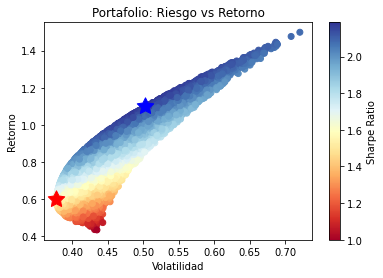

In [ ]:
%matplotlib inline

plt.scatter(x=df_simulacion['Volatilidad'], y=df_simulacion['Retornos'], c= df_simulacion['Sharpe_Ratio'],
           cmap = 'RdYlBu' )
plt.title('Portafolio: Riesgo vs Retorno')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')

#Agregamos un símbolo para identificar el punto (portafolio) con max Sharpe Ratio y otro para el de mínima volatilidad
plt.scatter(max_sharpe[1], max_sharpe[0], marker=(5,1,0), color= 'b', s=300)
plt.scatter(min_volatilidad[1], min_volatilidad[0], marker=(5,1,0), color= 'r', s=300)


Para el caso de una cartera el proceso es parecido, sólo necesitaríamos realizar el mismo proceso descargando los datos para el resto de activos en la cartera y con una variable con los pesos en forma de matriz con np.array(). La beta de una cartera es la suma ponderada de las individuales.

No hemos hablado de ello pero este modelo tiene limitaciones, como absolutamente todos: Cuestiones sobre la fiabilidad de la beta, mercado eficiente, racionalidad en la toma de decisiones, horizonte temporal de inversión y expectativas sobre los retornos, información disponible para todos.

Su facilidad de aplicación hace que sea un modelo útil si lo compaginamos, por supuesto, con otras técnicas y enfoques de valoración, pero no es recomendable dejarse influir demasiado por sus resultados, más allá de la obtención de unos datos estadísticos aproximados.

### Ejercicio: Hacer este ejercicio con al menos 3 criptomonedas


#Riesgo de Mercado (Simulación Histórica)

Existen trés métodos principales para medir el riesgo de mercado
* Simulación histórica
* Paramétrico
* Simulación de Monte Carlo



   **Pérdidas y Ganancias simulación histórica (sin alisado)**
   
Un enfoque más claro es suponer que tenemos:
1.   Una matriz $X_{(n+1)\times m}$ de $m$ factores de riesgo y $n+1$ observaciones. 
2.   Denotemos el vector de precios actual como $X_{00}:=(x_{0,1},x_{0,2},\ldots,x_{0,m})$. 
3.   Sea $r$ el número de instrumentos de un portafolio, entonces cada instrumento tiene una función de valuación $f_i\colon A_i \to R$ para todo $x\in X$, $i=1,\ldots, r$, donde $A_i\subset X_i$ con $\#(A_i)\leq \#(X_i)$.
4.   Sea $r$ el número de instrumentos de un portafolio, entonces cada instrumento tiene una función de valuación $f_i\colon A_i \to R$ para todo $x\in X$, $i=1,\ldots, r$, donde $A_i\subset X_i$ con $\#(A_i)\leq \#(X_i)$.
5.   Sea $M_{1\times r}=(m_1,\ldots,m_r)$ el vector de posiciones nominales de cada instrumento, es decir, el número de contratos que se tienen por instrumento $m_i\in R$ $(i=1,\ldots,r)$.

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd


In [ ]:
start = '2020-01-01'

symbol = ['AAPL','MSFT','SQ','AMZN']
stock_data = yf.download(symbol,start)
# stock_data = stock_data.history(start=start)#, end=end) 
# symbol1='APPL'
# stock_data = yf.Ticker(symbol)
# stock_data = stock_data.history(start=start)#, end=end) 


[*********************100%***********************]  2 of 2 completed



##Paso 1.
 (Generación de rendimientos) Construir ${\Delta X}_{n\times m}$ que es la matriz de diferencias basados en el operador $T_j$, es decir
		$${\Delta X}_t=\Big[ T_j(\frac{x_{t,1}}{x_{t+1,1}}), T_j(\frac{x_{t,2}}{x_{t+1,2}}),\ldots, T_j(\frac{x_{t,m}}{x_{t+1,m}})\Big]\quad t=0,1,\ldots, n-1.$$

In [ ]:
# yf.download?
print(stock_data.Close.head(5))

import numpy as np
X=stock_data.Close.tail(1)
X0=stock_data.Close.tail(1)
DeltaX=np.log(stock_data.Close/stock_data.Close.shift(-1))



                  GOOGL       TSLA
Date                              
2020-01-02  1368.680054  86.052002
2020-01-03  1361.520020  88.601997
2020-01-06  1397.810059  90.307999
2020-01-07  1395.109985  93.811996
2020-01-08  1405.040039  98.428001


In [ ]:
import pandas as pd
M=np.array([1000,5000])
print(M)

#Valoración

Y0=X0.squeeze()*M

Y0



[1000 5000]


GOOGL    2.527570e+06
TSLA     4.022900e+06
Name: 2022-03-07 00:00:00, dtype: float64

##Paso 2. 
Construir ${X^\ast}_{n\times m}$ que es la matriz de factores de riesgo simulada basada en el vector de precios actual $X_{00}$
		$$X_{t}^\ast=\Big[x_{0,1}T^{-1}_j(\Delta x_{t,1}), x_{0,2}T^{-1}_j(\Delta x_{t,2}),\ldots, x_{0,m}T^{-1}_j(\Delta x_{t,m})\Big]\quad (t=1,\ldots,n\quad j=1,2),$$
		donde $T_1(x)=\ln(x)$, $T_2(x)=x-1$.



In [ ]:
X_s=np.exp(DeltaX.squeeze())*X0.squeeze()
X_s.head

<bound method NDFrame.head of                   GOOGL        TSLA
Date                               
2020-01-02  2540.862189  781.423932
2020-01-03  2461.949124  789.380759
2020-01-06  2532.461886  774.527927
2020-01-07  2509.706587  766.847408
2020-01-08  2501.311497  822.632702
...                 ...         ...
2022-03-01  2517.991111  790.388360
2022-03-02  2540.255102  843.500985
2022-03-03  2565.759702  805.539804
2022-03-04  2638.129883  838.289978
2022-03-07          NaN         NaN

[549 rows x 2 columns]>

## Paso 3. 
Construcción de la matriz de reevaluación del portafolio basada en los escenarios históricos $Y_{n\times r}$ de todos los instrumentos financieros, es decir
		$$Y_t=[m_1f_1(X_{t}^\ast), m_2f_2(X_{t}^\ast),\ldots, m_rf_r(X_{t}^\ast)]\quad (t=1,\ldots,n).$$
    


In [ ]:
Y_s=X_s*M.squeeze()
Y_s.head


<bound method NDFrame.head of                    GOOGL          TSLA
Date                                  
2020-01-02  2.540862e+06  3.907120e+06
2020-01-03  2.461949e+06  3.946904e+06
2020-01-06  2.532462e+06  3.872640e+06
2020-01-07  2.509707e+06  3.834237e+06
2020-01-08  2.501311e+06  4.113164e+06
...                  ...           ...
2022-03-01  2.517991e+06  3.951942e+06
2022-03-02  2.540255e+06  4.217505e+06
2022-03-03  2.565760e+06  4.027699e+06
2022-03-04  2.638130e+06  4.191450e+06
2022-03-07           NaN           NaN

[549 rows x 2 columns]>

## Paso 4. 
Construcción de la matriz de pérdidas y ganancias del portafolio basada en los escenarios históricos $\Delta Y_{n\times r}$ de todos los instrumentos financieros, es decir
		$$\Delta Y_t=Y_0-Y_{t}=[m_1(f_1(X_{00})-f_1(X_{t}^\ast)), m_2( f_2(X_{00})-f_2(X_{t}^\ast)),\ldots, m_r(f_r(X_{00})-f_r(X_{t}^\ast))],$$
		para $(t=1,\ldots,n)$. Se puede obtener el vector de pérdidas totales ${\Delta YT}_{n\times m}$ muy fácilmente, esto es $\Delta YT=\sum_{k=1}^r Y_{kt}$ $(t=1,\ldots,n)$, incluso se puede hacer lo mismo por tipo de riesgo.


In [ ]:
PL=Y_s-Y0

cols=PL.shape[1]

PL['Total']=PL.sum(axis=1)
PL.head

<bound method NDFrame.head of                     GOOGL           TSLA          Total
Date                                                   
2020-01-02   13292.120440 -115780.423765 -102488.303325
2020-01-03  -65620.944670  -75996.288304 -141617.232974
2020-01-06    4891.818123 -150260.452735 -145368.634612
2020-01-07  -17863.481352 -188663.047285 -206526.528637
2020-01-08  -26258.571678   90263.422121   64004.850443
...                   ...            ...            ...
2022-03-01   -9578.956887  -70958.286671  -80537.243559
2022-03-02   12685.033829  194604.838695  207289.872524
2022-03-03   38189.633914    4798.936157   42988.570070
2022-03-04  110559.814453  168549.804687  279109.619141
2022-03-07            NaN            NaN       0.000000

[549 rows x 3 columns]>

##Paso 5. 
Obtenerla medida de riesgo basado en un nivel de confianza de la matriz ${\Delta Y}_{\cdot k}$ $(k=1,\ldots,r)$ y $\Delta YT$.

Las pérdidas y ganancias vía simulación histórica sin alisado es donde se ponderan los escenarios históricos con un mismo peso para todos, es decir cada escenario tiene una probabilidad de ocurrencia de $1/n$.

In [ ]:
alpha = 0.98 #@param {type:"slider", min:0.8, max:1, step:0.001}

###Valor en Riesgo (VaR)

Es un cuantil a un $\alpha$ de confianza de la distribución de pérdidas y ganancias, generalmente se expresa en términos monetarios.

#VaR

El valor en riesgo (VaR) es una estadística utilizada para tratar de cuantificar el nivel de riesgo financiero dentro de una empresa o cartera durante un período de tiempo específico. VaR proporciona una estimación de la pérdida máxima de una posición o cartera determinada durante un período de tiempo, y puede calcularla a través de varios niveles de confianza.

Estimar el riesgo de una cartera es importante para el crecimiento del capital a largo plazo y la gestión del riesgo, en particular dentro de empresas o instituciones más grandes. El VaR generalmente se enmarca como algo como esto:

“Tenemos un VaR de cartera de 250.000 USD para el próximo mes al 95% de confianza”
Esto significa que, con un 95% de confianza, podemos decir que la pérdida de la cartera no superará los 250.000 USD en un mes.
En esta publicación, lo guiaré a través de los pasos para calcular esta métrica en una cartera de acciones.

In [ ]:
VaR=PL.quantile(1-alpha, numeric_only=False)

VaR

GOOGL   -110005.780016
TSLA    -449204.845469
Total   -443779.509182
Name: 0.020000000000000018, dtype: float64

###Valor en Riesgo Condicional o "Expected Shortfall"

Es el promedio de las pérdidas que son más severas que el Valor en Riesgo ($VaR_\alpha$) a un $\alpha$ de confianza, es decir:
$$E(x|x\le VaR_\alpha)$$


In [ ]:
def VaR_Cond(x , VaR ):
  return np.mean(x[x <= VaR])

In [ ]:

VaR_C=[]

for i in range(0,PL.shape[1]):
  VC=VaR_Cond(PL.iloc[:,i],VaR[i])
  VaR_C.append(VC)


In [ ]:

print(VaR)
print(VaR_C)

pd.concat([VaR,pd.DataFrame(VaR_C).squeeze()], axis=1, ignore_index=True)

GOOGL   -110005.780016
TSLA    -449204.845469
Total   -443779.509182
Name: 0.020000000000000018, dtype: float64
[-161418.81223462243, -528103.050537752, -571784.7169181193]


,0,1
GOOGL,-110005.780016,NaN
TSLA,-449204.845469,NaN
Total,-443779.509182,NaN
0,NaN,-161418.812235
1,NaN,-528103.050538
2,NaN,-571784.716918


# Riesgo de Mercado ( Paramétrico)

Las medidas de riesgo por el método paramétrico para acciones, tipo de cambio y commodities son:

$$VaR_\alpha=\mu + \sigma\cdot\Phi^{-1}(\alpha)$$

$$CVaR_\alpha=\mu + \sigma\cdot\phi(\Phi^{-1}(\alpha))$$
donde: \\

$\mu$: Es el promedio ponderado del portafolio por la media de cada instrumento financiero. \\
$\sigma=\sqrt{w\Omega w^T }$, donde $\sum_{i=1}^n w_i=1$ y $\Omega$ es la matriz de varianza covarianza. \\
$\Phi^{-1}(\cdot)$: Normal estándar inversa. \\
$\phi(\cdot)$: Densidad de la normal estándar.



In [ ]:
!pip install yfinance
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt

Crear nuestra cartera de acciones, nuestra proporción de pesos, nuestra inversión y generamos los retornos

In [ ]:
tickers = ['AAPL','MSFT','SQ','AMZN']

weights = np.array([.25, .3, .15, .3])

initial_investment = 1000000

data = yf.download(tickers, '2020-01-01')["Close"]

returns = data.pct_change()

returns.tail()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,MSFT,SQ
Date,,,,
2022-03-01,-0.011628,-0.015765,-0.012852,-0.011294
2022-03-02,0.020588,0.006024,0.017766,-0.014279
2022-03-03,-0.001981,-0.027320,-0.014224,-0.080798
2022-03-04,-0.018408,-0.015264,-0.020479,-0.067414
2022-03-07,-0.023718,-0.056220,-0.037777,-0.084585


Creamos nuestra matriz de covarianza basada en los retornos

In [ ]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,AMZN,MSFT,SQ
AAPL,0.000541,0.000322,0.000403,0.000520
AMZN,0.000322,0.000464,0.000318,0.000472
MSFT,0.000403,0.000318,0.000468,0.000534
SQ,0.000520,0.000472,0.000534,0.001813


Calculamos el promedio del portafolio y su desviación estandar

In [ ]:
avg_rets = returns.mean()

Usamos el producto matricial para normalizar las medias individuales frente a las ponderaciones de inversión y su desviación estándar

In [ ]:
port_mean = avg_rets.dot(weights)
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

Calculamos la desviación estándar de la inversión y su media

In [ ]:
mean_investment = (1+port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev

Calculamos el inverso de la distribución acumulativa normal con un intervalo de confianza, una desviación estándar y una media específicos

In [ ]:
conf_level1 = 0.98 #@param {type:"slider", min:0.8, max:1, step:0.001}

Estimamos el valor en riesgo (VaR) para la cartera restando la inversión inicial del cálculo en el paso anterior

In [ ]:
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [ ]:
var_1d1 = initial_investment - cutoff1
var_1d1

-50294.14324976527

Valor en riesgo durante un período de tiempo de n días
¿Qué pasaría si quisiéramos calcular esto en una ventana de tiempo más grande? A continuación, podemos hacerlo fácilmente simplemente tomando nuestro VaR de 1 día y multiplicándolo por la raíz cuadrada del período de tiempo (esto se debe al hecho de que la desviación estándar de los rendimientos de las acciones tiende a aumentar con la raíz cuadrada del tiempo).

In [ ]:
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

1 day VaR @ 95% confidence: -50294.14
2 day VaR @ 95% confidence: -71126.66
3 day VaR @ 95% confidence: -87112.01
4 day VaR @ 95% confidence: -100588.29
5 day VaR @ 95% confidence: -112461.12
6 day VaR @ 95% confidence: -123194.99
7 day VaR @ 95% confidence: -133065.8
8 day VaR @ 95% confidence: -142253.32
9 day VaR @ 95% confidence: -150882.43
10 day VaR @ 95% confidence: -159044.05
11 day VaR @ 95% confidence: -166806.8
12 day VaR @ 95% confidence: -174224.02
13 day VaR @ 95% confidence: -181338.11
14 day VaR @ 95% confidence: -188183.45
15 day VaR @ 95% confidence: -194788.38


Gráfica

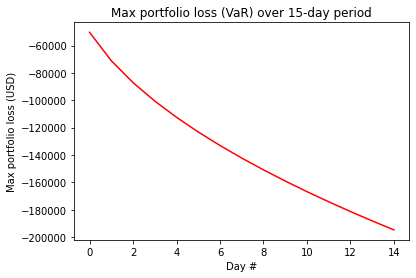

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

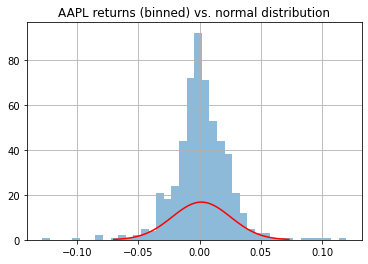

In [ ]:
import matplotlib.mlab as mlab
import scipy

returns['AAPL'].hist(bins=40, histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()

Ejercicio: Calcular CVaR

## Riesgo de mercado ( Simulación Montecarlo [Cholesky])

1. Construir ${\Delta X}_{n\times m}$ que es la matriz de diferencias basados en el operador $T_j$ (		donde $T_1(x)=\ln(x)$ ó $T_2(x)=x-1$), es decir $${\Delta X}_\tau=\Big[ T_j(\frac{x_{t,1}}{x_{t+\tau,1}}), T_j(\frac{x_{t,2}}{x_{t+\tau,2}}),\ldots, T_j(\frac{x_{t,m}}{x_{t+\tau,m}})\Big]\quad t=0,1,\ldots, n-1.$$
2. Calcular la matriz de correlación de ${\Delta X}_\tau$, i.e. $\Omega=Corr({\Delta X}_\tau)$. \\
3. Factorizar $\Omega=AA^\top$. \\
4. Analizar la distribución individual de las variaciones de los factores de riesgo ${\Delta X}_{\tau,k}$ ($k=1,\ldots,m$) para ajustar a una función de distribución paramétrica conocida ó utilizar la función empírica tal cual.
5. Calcular matriz $S$ de $N\times m$ valores con $$S_{i\cdot}=\Big[F^{-1}_{{\Delta X}_{\tau,1}}(\alpha_{i 1}),\ldots,F^{-1}_{{\Delta X}_{\tau,m}}(\alpha_{i m})\Big]$$ donde $\alpha_{i\cdot}\sim U(0,1)$ con $N\times m$ valores a.i.i.d. simulados, y $F^{-1}_{{\Delta X}_{\tau,k}}$ es la inversa de la distribución empírica o paramétrica (seleccionada en el paso anterior) de las variaciones del factor de riesgo $k$, i.e. de ${\Delta X}_{\tau,k}$ ($k=1,\ldots,m$).
6. Calcular matriz $\Delta X_{s_\tau}$ como $\Delta X_{s_\tau}=S\cdot A^\top$. 
7. Construir ${X}_{s_{N\times m}}$ que es la matriz de factores de riesgo simulada basada en el vector de precios actual $X_{00}$
$$X_{s_{i\cdot}}=\Big[x_{0,1}T^{-1}_j(\Delta x_{s_{i1}}), \ldots, x_{0,m}T^{-1}_j(\Delta x_{s_{im}})\Big]\quad (i=1,\ldots,N\quad j=1\, \textrm{ó}\, 2),$$
8. Construcción de la matriz de reevaluación del portafolio basada en los escenarios simulados $Y_{N\times r}$ de todos los instrumentos financieros, es decir $$Y_z=[m_1f_1(X_{s_z}), m_2f_2(X_{s_z}),\ldots, m_rf_r(X_{s_z})]\quad (z=1,\ldots,N).$$
9. Construcción de la matriz de pérdidas y ganancias del portafolio basada en los escenarios simulados $\Delta Y_{N\times r}$ de todos los instrumentos financieros, es decir $$\Delta Y_{z\cdot}=Y_z-Y_{0}=[m_1(f_1(X_{s_{z\cdot}})-f_1(X_{00})),\ldots, m_r(f_r(X_{s_{z\cdot}})-f_r(X_{00}))],$$
 para $(z=1,\ldots,N)$. Se puede obtener el vector de pérdidas totales ${\Delta YT}_{N}$ muy fácilmente, esto es $\Delta YT=\sum_{k=1}^r Y_{z\cdot}$ $(z=1,\ldots,N)$, incluso se puede hacer lo mismo por tipo de riesgo, ya que para cada tipo de riesgo pueden existir diferentes instrumentos, lo único que se tiene que hacer es sumar los instrumentos de un mismo tipo de riesgo por escenario.
10. Obtener las medidas de riesgo deseada de la matriz ${\Delta Y}_{\cdot k}$ $(k=1,\ldots,r)$ y $\Delta YT$, ejemplo se puede calcular $VaR_\alpha({\Delta Y}_{\cdot k})$, $CVaR_\alpha({\Delta Y}_{\cdot k})$, $CeR_\alpha({\Delta Y}_{\cdot k})$, $\mu(\Delta Y_{\cdot k})$, $\sigma(\Delta Y_{\cdot k})$, etc. para $k=1,\ldots,r$. 


In [ ]:
## Resolver